In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#read initial csv into a dataframe
csv_file = 'Main Avocado Tree (Resources)/avocado-updated-2020.csv'
avocado_df = pd.read_csv(csv_file)
avocado_df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [3]:
#read income csv into a dataframe
csv_income = 'Main Avocado Tree (Resources)/income per metropolitan area.csv'
income_df = pd.read_csv(csv_income)
income_df.head()

,Geography,State,Year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [4]:
#Rename columns to match those in Avocado
rename_income_df = income_df.rename(columns={"Geography": "geography", "Year":"year"})
rename_income_df.head()

,geography,State,year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [5]:
#convert date into three columns
split_cols = avocado_df['date'].str.split('-',expand=True)
split_cols.columns = [f'Split-{i}' for i in range(3)]
avocado_df = avocado_df.join(split_cols)
#rename splits to day, month
avocado_df = avocado_df.rename(columns={'Split-1':'month','Split-2':'day'})
#drop Split-0 due to redundancy with year column
avocado_df = avocado_df.drop(['Split-0'], axis=1)
#better geography match
#used https://hassavocadoboard.com/category-data to confirm state match to income data
#Drop Cities with same name, wrong state from income data
#Drop all Springfields except Springfield MA from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'MO')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'IL')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'OH')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Eugene-Springfield') & (rename_income_df['State'] == ' OR')].index)
#Drop Albanies not NY from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Albany-Lebanon') & (rename_income_df['State'] == ' OR')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Albany') & (rename_income_df['State'] == ' GA')].index)
#Drop all Columbuses not OH from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Columbus') & (rename_income_df['State'] == ' GA-AL')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Columbus') & (rename_income_df['State'] == ' IN')].index)
#Drop all Jacksonvilles not FL
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Jacksonville') & (rename_income_df['State'] == ' NC')].index)
#Drop all Portlands not OR
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Portland-South Portland') & (rename_income_df['State'] == ' ME')].index)
#Drop all Rochesters not NY
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Rochester') & (rename_income_df['State'] == ' MN')].index)

#text to column cities in income and avocado data
columnTOtext1 = rename_income_df['geography'].str.split('-',expand=True)
columnTOtext1.columns = [f'geography-{i}' for i in range(4)]
new_income = rename_income_df.join(columnTOtext1)
new_income = new_income.drop(['geography'], axis=1)
columnTOtext = avocado_df['geography'].str.split('/',expand=True)
columnTOtext.columns = [f'geography-{i}' for i in range(2)]
new_avocado = avocado_df.join(columnTOtext)
new_avocado = new_avocado.drop(['geography'], axis=1)

#keep rows that only have one city
second_cities = new_income['geography-1'].unique()
second_cities = second_cities.tolist()
del second_cities[0]

new_income_first = new_income[~new_income['geography-1'].isin(second_cities)]
new_income_first = new_income_first.drop(['geography-1', 'geography-2', 'geography-3'], axis=1)
#merge data frame based on new_income_first
first = new_avocado.merge(new_income_first, how='inner', on=['geography-0', 'year'])
first_geo_0 = first['geography-0'].unique()
first_geo_0 = first_geo_0.tolist()
first_geo_1 = first['geography-1'].unique()
#remove already merged cities from new_avocado
new_avocado = new_avocado[~new_avocado['geography-0'].isin(first_geo_0)]
#keep rows that only have a two cities
new_income_second = new_income.dropna(subset=['geography-1'])
new_avocado_second = new_avocado.dropna(subset=['geography-1'])
third_cities = new_income_second['geography-2'].unique()
third_cities = third_cities.tolist()
del third_cities[2]

new_income_second = new_income_second[~new_income_second['geography-2'].isin(third_cities)]
new_income_second = new_income_second.drop(['geography-2', 'geography-3'], axis=1)

#merge data frame based on new_income_second
second = new_avocado.merge(new_income_second, how='inner', on=['geography-0', 'year'])
second = second.drop(['geography-1_y'], axis=1)
second = second.rename(columns={'geography-1_x':'geography-1'})
second_geo_0 = second['geography-0'].unique()
second_geo_0 = second_geo_0.tolist()
#remove already merged cities
new_avocado = new_avocado[~new_avocado['geography-0'].isin(second_geo_0)]
#keep rows that only have a three cities
new_income_third = new_income.dropna(subset=['geography-2'])
fourth_cities = new_income_third['geography-3'].unique()
fourth_cities = fourth_cities.tolist()
del fourth_cities[0]

new_income_third = new_income_third[~new_income_third['geography-3'].isin(fourth_cities)]
new_income_third = new_income_third.drop(['geography-3'], axis=1)

#merge dataframes
third = new_avocado.merge(new_income_third, how='inner', on=['geography-0', 'year'])
third = third.drop(['geography-1_y', 'geography-2'], axis=1)
third = third.rename(columns={'geography-1_x':'geography-1'})
third_geo_0 = third['geography-0'].unique()
third_geo_0 = third_geo_0.tolist()
#remove already merged cities
new_avocado = new_avocado[~new_avocado['geography-0'].isin(third_geo_0)]
#keep rows that only have a four cities
new_income_fourth = new_income.dropna(subset=['geography-3'])

#merge dataframes
fourth = new_avocado.merge(new_income_fourth, how='inner', on=['geography-0', 'year'])
fourth = fourth.drop(['geography-1_y', 'geography-2', 'geography-3'], axis=1)
fourth = fourth.rename(columns={'geography-1_x':'geography-1'})

#combine merged dataframes into one
income_avocado = first.append(second)
income_avocado = income_avocado.append(third)
income_avocado = income_avocado.append(fourth)

#get list of cities in dataframe
unique_cities = income_avocado['geography-0'].unique()
unique_cities = unique_cities.tolist()
income_avocado.reset_index()
income_avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,month,day,geography-0,geography-1,State,Per capita personal income
0,2017-01-01,0.64,329279.29,2646.83,130250.60,2530.91,193850.95,30669.35,163180.08,1.52,conventional,2017,01,01,Cincinnati,Dayton,OH-KY-IN,51844
1,2017-01-01,1.23,10798.25,351.72,8558.19,0.00,1888.34,293.33,1595.01,0.00,organic,2017,01,01,Cincinnati,Dayton,OH-KY-IN,51844
2,2017-01-08,0.82,285027.21,4147.01,126967.13,991.09,152921.98,33746.17,118612.86,562.95,conventional,2017,01,08,Cincinnati,Dayton,OH-KY-IN,51844
3,2017-01-08,1.07,12346.01,323.43,6801.77,0.00,5220.81,654.36,4566.45,0.00,organic,2017,01,08,Cincinnati,Dayton,OH-KY-IN,51844
4,2017-01-15,0.76,346523.78,2939.57,125731.86,994.43,216857.92,29095.07,187759.83,3.02,conventional,2017,01,15,Cincinnati,Dayton,OH-KY-IN,51844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2019-12-15,1.58,7481.67,60.37,891.36,0.00,6529.94,3934.64,2595.30,0.00,organic,2019,12,15,Nashville,None,TN,60680
304,2019-12-22,0.88,210276.00,85573.42,6270.17,329.50,118102.91,96998.28,20685.57,419.06,conventional,2019,12,22,Nashville,None,TN,60680
305,2019-12-22,1.32,10033.83,66.47,698.10,0.00,9269.26,6199.39,3069.87,0.00,organic,2019,12,22,Nashville,None,TN,60680
306,2019-12-29,0.82,230398.16,97961.88,5935.34,219.98,126280.96,107077.99,18849.51,353.46,conventional,2019,12,29,Nashville,None,TN,60680


In [14]:
grouped_year_city = pd.DataFrame(income_avocado.groupby(["geography-0", "year"]).mean().round(2))
grouped_year_city

average_price  total_volume       4046      4225     4770  \
geography-0 year                                                              
Albany      2017           1.64      49354.55    1608.51  39712.43   151.47   
            2018           1.45      64017.27    5076.33  47879.76    49.18   
            2019           1.43      62896.96    2294.52  51627.03   135.17   
Atlanta     2017           1.43     271840.75  130942.53  30604.90   225.72   
            2018           1.28     354738.27  157432.63  22102.10   851.46   
...                         ...           ...        ...       ...      ...   
Syracuse    2018           1.22      45978.59    3300.99  22631.68    50.73   
            2019           1.35      43962.57    1790.03  24367.89    46.70   
Tampa       2017           1.62     193869.22  113704.23  27695.45   111.01   
            2018           1.31     273352.89  167546.43  20813.41   710.79   
            2019           1.14     299179.74  117290.64   9835.28  1611.04   

                  total_bags  small_bags  large_bags  xlarge_bags  \
geography-0 year                                                    
Albany      2017     7882.13     4943.01     2763.06       176.07   
            2018    11012.01     8517.80     2337.87       156.34   
            2019     8840.22     5559.95     2983.66       296.63   
Atlanta     2017   110067.61    70132.17    38002.92      1932.52   
            2018   174352.08   116114.02    56468.31      1769.76   
...                      ...         ...         ...          ...   
Syracuse    2018    19995.19    11954.22     8023.63        17.34   
            2019    17754.42    10014.02     7397.11       343.29   
Tampa       2017    52358.53    27810.86    23736.22       811.44   
            2018    84282.25    42565.48    40662.93      1053.84   
            2019   170442.78    65435.71   102824.95      2182.11   

                  Per capita personal income  
geography-0 year                              
Albany      2017                       56487  
            2018                       58443  
            2019                       60767  
Atlanta     2017                       50680  
            2018                       53188  
...                                      ...  
Syracuse    2018                       49954  
            2019                       52051  
Tampa       2017                       45468  
            2018                       47332  
            2019                       48908  

[126 rows x 10 columns]

In [8]:
#get averages for each city per month per year, essentially condense all the data points per month into one averaged value
grouped_by_month = pd.DataFrame(income_avocado.groupby(["month", "year", "geography-0"]).mean().round(2))
grouped_by_month

average_price  total_volume       4046       4225  \
month year geography-0                                                      
01    2017 Albany                1.68      54358.82    1982.22   45536.40   
           Atlanta               1.30     312435.19  136379.11   52640.23   
           Baltimore             1.63     410746.22   38433.04  268689.02   
           Boston                1.60     311370.05    2768.08  243274.57   
           Buffalo               1.49      77167.85     807.77   35426.48   
...                               ...           ...        ...        ...   
12    2019 Seattle               1.54     307811.57   33697.76   43468.79   
           Spokane               1.42      48944.35    8905.84    5437.08   
           St. Louis             1.56      81912.20   35349.91    5267.02   
           Syracuse              1.23      37224.86    1607.66   20664.96   
           Tampa                 1.01     287345.11  100254.26    7396.81   

                           4770  total_bags  small_bags  large_bags  \
month year geography-0                                                
01    2017 Albany        354.06     6486.15     6420.49       64.34   
           Atlanta       122.54   123293.31    78439.04    44854.27   
           Baltimore    6970.67    96653.50    94691.00     1544.72   
           Boston       3900.68    61426.71    60755.81      670.90   
           Buffalo        38.98    40894.62    40037.15      805.11   
...                         ...         ...         ...         ...   
12    2019 Seattle       511.33   230133.68   101257.26   128095.08   
           Spokane        42.24    34559.09    19429.43    14884.32   
           St. Louis     228.53    41066.74    35037.18     2969.64   
           Syracuse       17.74    14934.50     4464.97     9857.66   
           Tampa         845.02   178849.12    54892.48   123526.62   

                        xlarge_bags  Per capita personal income  
month year geography-0                                           
01    2017 Albany              1.32                       56487  
           Atlanta             0.00                       50680  
           Baltimore         417.78                       59774  
           Boston              0.00                       75012  
           Buffalo            52.36                       48942  
...                             ...                         ...  
12    2019 Seattle           781.24                       78073  
           Spokane           245.44                       47827  
           St. Louis        3059.82                       56923  
           Syracuse          611.98                       52051  
           Tampa             429.92                       48908  

[1512 rows x 10 columns]

In [9]:
data_2017 = income_avocado[income_avocado["year"] == 2017]
month_2017 = pd.DataFrame(data_2017)
month_2017 = pd.DataFrame(data_2017.groupby(["month"]).mean().round(2))
months_list = [1,2,3,4,5,6,7,8,9,10,11,12]
month_2017['month'] = months_list
month_2017 = month_2017[["year", "average_price", "month"]]
month_2017

,year,average_price,month
month,,,
01,2017.0,1.29,1
02,2017.0,1.23,2
03,2017.0,1.43,3
04,2017.0,1.54,4
05,2017.0,1.56,5
06,2017.0,1.57,6
07,2017.0,1.58,7
08,2017.0,1.71,8
09,2017.0,1.85,9


In [10]:
data_2018 = income_avocado[income_avocado["year"] == 2018]
month_2018 = pd.DataFrame(data_2018)
month_2018 = pd.DataFrame(data_2018.groupby(["month"]).mean().round(2))
months_list = [1,2,3,4,5,6,7,8,9,10,11,12]
month_2018['month'] = months_list
month_2018 = month_2018[["year", "average_price", "month"]]
month_2018

,year,average_price,month
month,,,
01,2018.0,1.37,1
02,2018.0,1.33,2
03,2018.0,1.34,3
04,2018.0,1.33,4
05,2018.0,1.29,5
06,2018.0,1.32,6
07,2018.0,1.34,7
08,2018.0,1.43,8
09,2018.0,1.48,9


In [11]:
data_2019 = income_avocado[income_avocado["year"] == 2019]
month_2019 = pd.DataFrame(data_2019)
month_2019 = pd.DataFrame(data_2019.groupby(["month"]).mean().round(2))
months_list = [1,2,3,4,5,6,7,8,9,10,11,12]
month_2019['month'] = months_list
month_2019 = month_2019[["year", "average_price", "month"]]
month_2019

,year,average_price,month
month,,,
01,2019.0,1.28,1
02,2019.0,1.20,2
03,2019.0,1.23,3
04,2019.0,1.43,4
05,2019.0,1.54,5
06,2019.0,1.53,6
07,2019.0,1.73,7
08,2019.0,1.61,8
09,2019.0,1.46,9


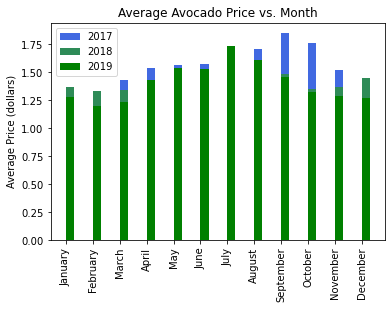

In [12]:
#look at bar graphs comparing months
n = 12
width = 0.3
month_names2 = np.arange(n)

bar_2017 = month_2017["average_price"]
bar_2018 = month_2018["average_price"]
bar_2019 = month_2019["average_price"]

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(month_names2+width, bar_2017, width, color='royalblue')
rects2 = ax.bar(month_names2+width, bar_2018, width, color='seagreen')
rects3 = ax.bar(month_names2+width, bar_2019, width, color='g')
plt.ylabel('Average Price (dollars)')
plt.title('Average Avocado Price vs. Month')
labels = ('2017', '2018', '2019')
plt.legend(labels=labels,loc='best')
plt.xticks(month_names2 + width / 2, ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), rotation=90)
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphics.png')
plt.show()



Text(0, 0.5, 'Price (dollars)')

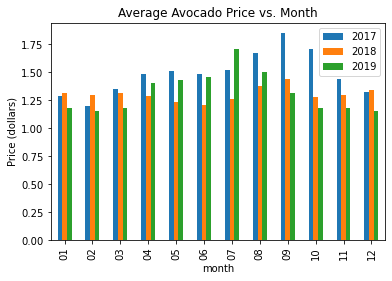

In [173]:
df = pd.DataFrame({'2017':bar_2017, '2018':bar_2018, '2019':bar_2019})
df.plot(kind='bar', stacked=False)
plt.title('Average Avocado Price vs. Month')
plt.ylabel('Price (dollars)')

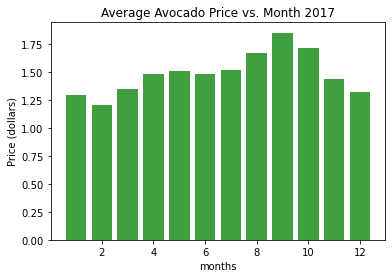

In [174]:
plt.bar(month_2017['month'], month_2017['average_price'], color='green', alpha=0.75)
plt.title('Average Avocado Price vs. Month 2017')
plt.ylabel('Price (dollars)')
plt.xlabel('months')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphics1.png')
plt.show()

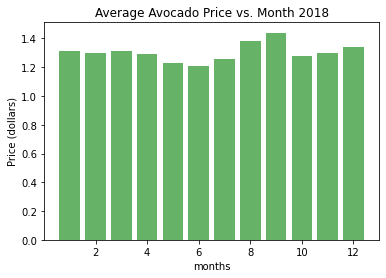

In [175]:
plt.bar(month_2018['month'], month_2018['average_price'], color='green', alpha=0.6)
plt.title('Average Avocado Price vs. Month 2018')
plt.ylabel('Price (dollars)')
plt.xlabel('months')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphics2.png')
plt.show()

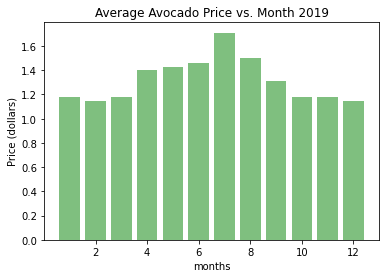

In [176]:
plt.bar(month_2019['month'], month_2019['average_price'], color='green', alpha=0.5)
plt.title('Average Avocado Price vs. Month 2019')
plt.ylabel('Price (dollars)')
plt.xlabel('months')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphics3.png')
plt.show()

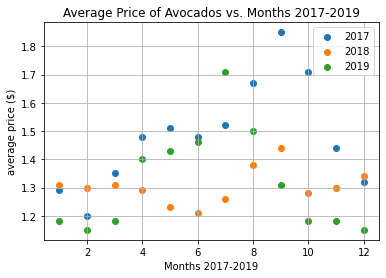

In [177]:
#show all scatter plots of year vs. average prices
plt.scatter(month_2017['month'], month_2017['average_price'])
plt.scatter(month_2018['month'], month_2018['average_price'])
plt.scatter(month_2019['month'], month_2019['average_price'])
plt.title('Average Price of Avocados vs. Months 2017-2019')
plt.xlabel('Months 2017-2019')
plt.ylabel('average price ($)')
plt.grid()
labels= ('2017', '2018', '2019')
plt.legend(labels=labels,loc='best')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphicsscatter.png')
plt.show()

The r-squared value is: 0.24623088315873423
The r-value is: 0.49621656880714315


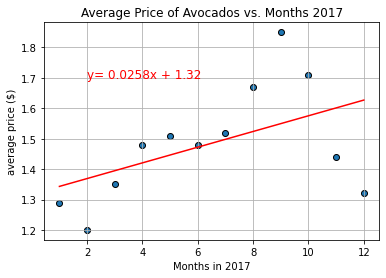

In [178]:
#linear regress 2017
x_values = month_2017['month']
y_values = month_2017['average_price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))

res = st.linregress(month_2017['month'], month_2017['average_price'])
print(f'The r-squared value is: {res.rvalue**2}')
print(f'The r-value is: {res.rvalue}')

plt.scatter(month_2017['month'], month_2017['average_price'], edgecolors='black')
plt.title('Average Price of Avocados vs. Months 2017')
plt.xlabel('Months in 2017')
plt.ylabel('average price ($)')
plt.grid()
plt.annotate(line_eq, (2,1.7), fontsize=12, color='red')
plt.plot(month_2017['month'], res.intercept + res.slope*month_2017['month'], 'r', label='fitted line')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphicsscatter2017.png')
plt.show()

The r-squared value is: 0.07686028591747893
The r-value is: 0.2772368769075985


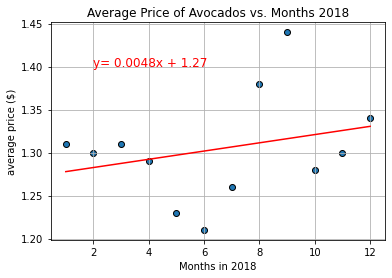

In [179]:
#linear regress 2018
x_values = month_2018['month']
y_values = month_2018['average_price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))

res = st.linregress(month_2018['month'], month_2018['average_price'])
print(f'The r-squared value is: {res.rvalue**2}')
print(f'The r-value is: {res.rvalue}')

plt.scatter(month_2018['month'], month_2018['average_price'], edgecolors='black')
plt.title('Average Price of Avocados vs. Months 2018')
plt.xlabel('Months in 2018')
plt.ylabel('average price ($)')
plt.grid()
plt.annotate(line_eq, (2,1.40), fontsize=12, color='red')
plt.plot(month_2018['month'], res.intercept + res.slope*month_2018['month'], 'r', label='fitted line')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphicsscatter2018.png')
plt.show()

The r-squared value is: 1.2178129994555037e-05
The r-value is: -0.003489717752849797
Based on our linear regression we expect avocados to cost $ 1.32 in May 2021


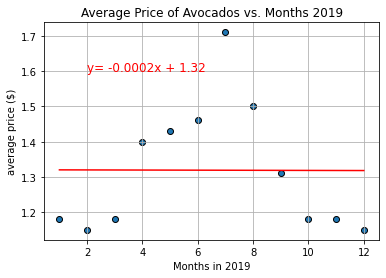

In [190]:
#linear regress 2019
x_values = month_2019['month']
y_values = month_2019['average_price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
desired_prediction_month = 5
line_eq = "y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))

res = st.linregress(month_2019['month'], month_2019['average_price'])
print(f'The r-squared value is: {res.rvalue**2}')
print(f'The r-value is: {res.rvalue}')
print(f'Based on our linear regression we expect avocados to cost $ {round((res.slope*desired_prediction_month) + res.intercept, 2)} in May 2021')
plt.scatter(month_2019['month'], month_2019['average_price'], edgecolors='black')
plt.title('Average Price of Avocados vs. Months 2019')
plt.xlabel('Months in 2019')
plt.ylabel('average price ($)')
plt.grid()
plt.annotate(line_eq, (2,1.6), fontsize=12, color='red')
plt.plot(month_2019['month'], res.intercept + res.slope*month_2019['month'], 'r', label='fitted line')
plt.savefig('/Users/bitty/Documents/GitHub/project_one_bitty/project_one/Output/question5graphicsscatter2019.png')
plt.show()

In [181]:
# Question 1: Which cities love avocados most?

#Task 1: popularity of avocado, visual heatmap, 2015 to 2020, bar graph of volume per area 

In [182]:
#Question 2: Do states with higher income per capita buy more avocados? (income per capita from 2017-2019)

#Task 2: line graph (x-values states, y-values income per capita and avocado revenue) 

In [183]:
#Question 3: Which type of avocado is the biggest source of revenue for suppliers? Erica

#Task 3: Five pie charts by type (value = revenue) for each year on one png 

In [184]:
#Question 4: Is there a time of year that sees a spike in revenue? Erica

#Task 4: bar chart (x-values months, y-values avocado revenue)

In [185]:
#Question 5: How has the average avocado price changed over time?  What is the predicted avocado price for 2021 based on our data?  Bitty

#Task 5: scatter plot with regression to predict 2021 average price 

In [186]:
#Question 6: Do different types of avocados have different price trends? Arianne

#Task 6: facet (multiple lines on one) line graph (x-values = year, y-values = average price) for each type

In [187]:
#look at volume for 4046
plot_4046 = [['4046','year','average_price']]

In [188]:
#look at volume for 4225
plot_4225= [['4225', 'year', 'average_price']]

In [189]:
#Look at Volume for 4770
plot_4770 = [['4770', 'year', 'average_price']]
